# 0.0 Imports

In [10]:
import warnings

import numpy as np
import pandas as pd
from sklearn import metrics as mt
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from matplotlib import pyplot as plt

In [3]:
warnings.filterwarnings('ignore')

# 1.0 Load Dataset

In [4]:
#Data Path
data_path_X_trian = '../regressao/X_training.csv'
data_path_y_trian = '../regressao/y_training.csv'

data_path_X_val = '../regressao/X_validation.csv'
data_path_y_val = '../regressao/y_val.csv'

data_path_X_test = '../regressao/X_test.csv'
data_path_y_test = '../regressao/y_test.csv'

# Train Dataset
X_train = pd.read_csv(data_path_X_trian)
y_train = pd.read_csv(data_path_y_trian)

# Validation Dataset
X_val = pd.read_csv(data_path_X_val)
y_val = pd.read_csv(data_path_y_val)

# Test Dataset
X_test = pd.read_csv(data_path_X_test)
y_test = pd.read_csv(data_path_y_test)

In [5]:
y_train = y_train.iloc[:, 0]
y_val = y_val.iloc[:, 0]
y_test = y_test.iloc[:, 0]

# 2.0 Performance

## 2.1 Train Performance

In [6]:
# Define Polynomial Model
poly = PolynomialFeatures()
X_poly_train = poly.fit_transform(X_train)

# Define Elastic Net Model
poly_elastic_net = ElasticNet(random_state=42)

# Fit Model
poly_elastic_net.fit(X_poly_train, y_train)

# Predict
y_pred_train = poly_elastic_net.predict(X_poly_train)

# Performance Metrics
r2_train = mt.r2_score(y_train, y_pred_train)
mse_train = mt.mean_squared_error(y_train, y_pred_train)
rmse_train = mt.mean_squared_error(y_train, y_pred_train, squared= False)
mae_train = mt.mean_absolute_error(y_train, y_pred_train)
mape_train = mt.mean_absolute_percentage_error(y_train, y_pred_train)

print(f"Train R2: {r2_train}")
print(f"Train MSE: {mse_train}")
print(f"Train RMSE: {rmse_train}")
print(f"Train MAE: {mae_train}")
print(f"Train MAPE: {mape_train}")

Train R2: 0.012832763427018778
Train MSE: 471.8783378824533
Train RMSE: 21.722760825513255
Train MAE: 17.244236014680347
Train MAPE: 8.678785850035073


## 2.2 Validation Performance

In [7]:
# Define Polynomial Model
poly = PolynomialFeatures()
X_poly_train = poly.fit_transform(X_train)
X_poly_val = poly.fit_transform(X_val)

# Define Elastic Net Model
poly_elastic_net = ElasticNet(random_state=42)

# Fit Model
poly_elastic_net.fit(X_poly_train, y_train)

# Predict
y_pred_val = poly_elastic_net.predict(X_poly_val)


# Performance Metrics
r2_val = mt.r2_score(y_val, y_pred_val)
mse_val = mt.mean_squared_error(y_val, y_pred_val)
rmse_val = mt.mean_squared_error(y_val, y_pred_val, squared= False)
mae_val = mt.mean_absolute_error(y_val, y_pred_val)
mape_val = mt.mean_absolute_percentage_error(y_val, y_pred_val)

print(f"Validation R2: {r2_val}")
print(f"Validation MSE: {mse_val}")
print(f"Validation RMSE: {rmse_val}")
print(f"Validation MAE: {mae_val}")
print(f"Validation MAPE: {mape_val}")

Validation R2: 0.012781775822342856
Validation MSE: 471.4081655799173
Validation RMSE: 21.711936016392396
Validation MAE: 17.19996619878308
Validation MAPE: 8.675108462242978


## 2.3 Fine Tunning

### Parameteres:
- `degree`
- `alpha`
- `max_iter`

### Degree

In [8]:
degree = np.arange(1,6)

r2_list = []
mse_list = []
rmse_list = []
mae_list = []
mape_list = []

In [9]:
for i in degree:
    # Define Polynomial Model
    poly = PolynomialFeatures(degree=i)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_val = poly.fit_transform(X_val)

    # Define Elastic Net Model
    poly_elastic_net = ElasticNet(random_state=42)

    # Fit Model
    poly_elastic_net.fit(X_poly_train, y_train)

    # Predict
    y_pred = poly_elastic_net.predict(X_poly_val)


    # Performance Metrics
    r2 = mt.r2_score(y_val, y_pred)
    mse = mt.mean_squared_error(y_val, y_pred)
    rmse = mt.mean_squared_error(y_val, y_pred, squared= False)
    mae = mt.mean_absolute_error(y_val, y_pred)
    mape = mt.mean_absolute_percentage_error(y_val, y_pred)

    r2_list.append(r2)
    mse_list.append(mse)
    rmse_list.append(rmse)
    mae_list.append(mae)
    mape_list.append(mape)

    print(f"Degree: {i}, RMSE: {rmse}")

Degree: 1, RMSE: 21.76317109916543
Degree: 2, RMSE: 21.711936016392396
Degree: 3, RMSE: 21.69248795804233
Degree: 4, RMSE: 22.497638169043938
Degree: 5, RMSE: 57.024799061573034


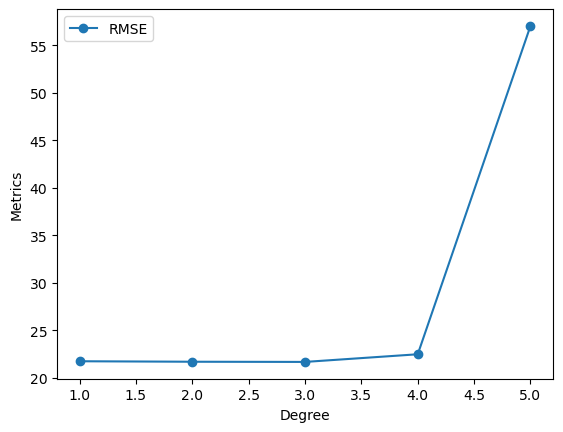

In [11]:
plt.plot(degree, rmse_list, marker="o", label="RMSE")
plt.xlabel("Degree")
plt.ylabel("Metrics")
plt.legend()

In [12]:
best_degree = degree[np.argmin(rmse_list)]
best_degree

3

### Alpha

In [13]:
alpha = np.arange(0.0, 2.1, 0.1)

r2_list = []
mse_list = []
rmse_list = []
mae_list = []
mape_list = []

In [14]:
for i in alpha:
    # Define polynomial model
    poly = PolynomialFeatures(degree=best_degree)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_val = poly.fit_transform(X_val)

    # Train and Fit Model
    poly_elastic_net = ElasticNet(random_state=42, alpha=i)
    poly_elastic_net.fit(X_poly_train, y_train)

    # Predict
    y_pred = poly_elastic_net.predict(X_poly_val)

    # Performance Metrics
    r2 = mt.r2_score(y_val, y_pred)
    mse = mt.mean_squared_error(y_val, y_pred)
    rmse = mt.mean_squared_error(y_val, y_pred, squared=False)
    mae = mt.mean_absolute_error(y_val, y_pred)
    mape = mt.mean_absolute_percentage_error(y_val, y_pred)

    r2_list.append(r2)
    mse_list.append(mse)
    rmse_list.append(rmse)
    mae_list.append(mae)
    mape_list.append(mape)

    print(f"Alpha: {i}, RMSE: {rmse}")

Alpha: 0.0, RMSE: 21.73316819750569
Alpha: 0.1, RMSE: 21.319831791780512
Alpha: 0.2, RMSE: 21.386016067766846
Alpha: 0.30000000000000004, RMSE: 21.45581151495478
Alpha: 0.4, RMSE: 21.53267531721072
Alpha: 0.5, RMSE: 21.599671629585277
Alpha: 0.6000000000000001, RMSE: 21.646216167316105
Alpha: 0.7000000000000001, RMSE: 21.675608393000378
Alpha: 0.8, RMSE: 21.687876144601017
Alpha: 0.9, RMSE: 21.690853843202362
Alpha: 1.0, RMSE: 21.69248795804233
Alpha: 1.1, RMSE: 21.693761520193608
Alpha: 1.2000000000000002, RMSE: 21.695504045533976
Alpha: 1.3, RMSE: 21.69884776472749
Alpha: 1.4000000000000001, RMSE: 21.704004372185416
Alpha: 1.5, RMSE: 21.710579275425346
Alpha: 1.6, RMSE: 21.718336173026795
Alpha: 1.7000000000000002, RMSE: 21.726828783859876
Alpha: 1.8, RMSE: 21.735365448799097
Alpha: 1.9000000000000001, RMSE: 21.743431229280713
Alpha: 2.0, RMSE: 21.75183076043075


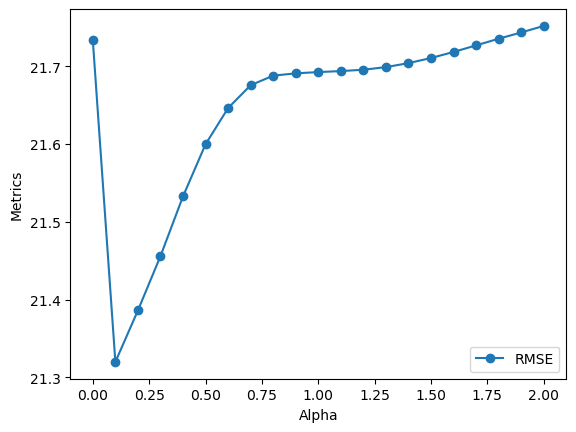

In [15]:
plt.plot(alpha, rmse_list, marker="o", label="RMSE")
plt.xlabel("Alpha")
plt.ylabel("Metrics")
plt.legend()

In [16]:
best_alpha = alpha[np.argmin(rmse_list)]
best_alpha

0.1

### L1 Ratio

In [17]:
l1_ratio = np.arange(0.0, 1.1, 0.1)

r2_list = []
mse_list = []
rmse_list = []
mae_list = []
mape_list = []

In [18]:
for i in l1_ratio:
    # Define polynomial model
    poly = PolynomialFeatures(degree=3)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_val = poly.fit_transform(X_val)

    # Train and Fit Model
    poly_elastic_net = ElasticNet(random_state=42, l1_ratio=i)
    poly_elastic_net.fit(X_poly_train, y_train)

    # Predict
    y_pred = poly_elastic_net.predict(X_poly_val)

    # Performance Metrics
    r2 = mt.r2_score(y_val, y_pred)
    mse = mt.mean_squared_error(y_val, y_pred)
    rmse = mt.mean_squared_error(y_val, y_pred, squared=False)
    mae = mt.mean_absolute_error(y_val, y_pred)
    mape = mt.mean_absolute_percentage_error(y_val, y_pred)

    r2_list.append(r2)
    mse_list.append(mse)
    rmse_list.append(rmse)
    mae_list.append(mae)
    mape_list.append(mape)

    print(f"L1 Ratio: {i}, RMSE: {rmse}")

L1 Ratio: 0.0, RMSE: 21.486148227893114
L1 Ratio: 0.1, RMSE: 21.54657210518207
L1 Ratio: 0.2, RMSE: 21.608326720825037
L1 Ratio: 0.30000000000000004, RMSE: 21.656460926290116
L1 Ratio: 0.4, RMSE: 21.68232085359498
L1 Ratio: 0.5, RMSE: 21.69248795804233
L1 Ratio: 0.6000000000000001, RMSE: 21.695178978690194
L1 Ratio: 0.7000000000000001, RMSE: 21.697146183414517
L1 Ratio: 0.8, RMSE: 21.6962074655442
L1 Ratio: 0.9, RMSE: 21.697731909279483
L1 Ratio: 1.0, RMSE: 21.69690689620617


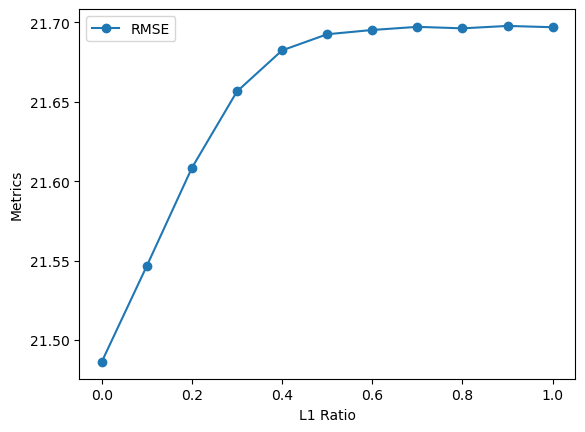

In [19]:
plt.plot(l1_ratio, rmse_list, marker="o", label="RMSE")
plt.xlabel("L1 Ratio")
plt.ylabel("Metrics")
plt.legend()

In [20]:
best_l1 = l1_ratio[np.argmin(rmse_list)]
best_l1

0.0

### Max Iter

In [21]:
max_iter = np.arange(100, 2100, 100)

r2_list = []
mse_list = []
rmse_list = []
mae_list = []
mape_list = []

In [22]:
for i in max_iter:
    # Define polynomial model
    poly = PolynomialFeatures(degree=best_degree)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_val = poly.fit_transform(X_val)

    # Train and Fit Model
    poly_elastic_net = ElasticNet(random_state=42, max_iter=i)
    poly_elastic_net.fit(X_poly_train, y_train)

    # Predict
    y_pred = poly_elastic_net.predict(X_poly_val)

    # Performance Metrics
    r2 = mt.r2_score(y_val, y_pred)
    mse = mt.mean_squared_error(y_val, y_pred)
    rmse = mt.mean_squared_error(y_val, y_pred, squared=False)
    mae = mt.mean_absolute_error(y_val, y_pred)
    mape = mt.mean_absolute_percentage_error(y_val, y_pred)

    r2_list.append(r2)
    mse_list.append(mse)
    rmse_list.append(rmse)
    mae_list.append(mae)
    mape_list.append(mape)

    print(f"Max Iter: {i}, RMSE: {rmse}")

Max Iter: 100, RMSE: 21.692884881847988
Max Iter: 200, RMSE: 21.69248795804233
Max Iter: 300, RMSE: 21.69248795804233
Max Iter: 400, RMSE: 21.69248795804233
Max Iter: 500, RMSE: 21.69248795804233
Max Iter: 600, RMSE: 21.69248795804233
Max Iter: 700, RMSE: 21.69248795804233
Max Iter: 800, RMSE: 21.69248795804233
Max Iter: 900, RMSE: 21.69248795804233
Max Iter: 1000, RMSE: 21.69248795804233
Max Iter: 1100, RMSE: 21.69248795804233
Max Iter: 1200, RMSE: 21.69248795804233
Max Iter: 1300, RMSE: 21.69248795804233
Max Iter: 1400, RMSE: 21.69248795804233
Max Iter: 1500, RMSE: 21.69248795804233
Max Iter: 1600, RMSE: 21.69248795804233
Max Iter: 1700, RMSE: 21.69248795804233
Max Iter: 1800, RMSE: 21.69248795804233
Max Iter: 1900, RMSE: 21.69248795804233
Max Iter: 2000, RMSE: 21.69248795804233


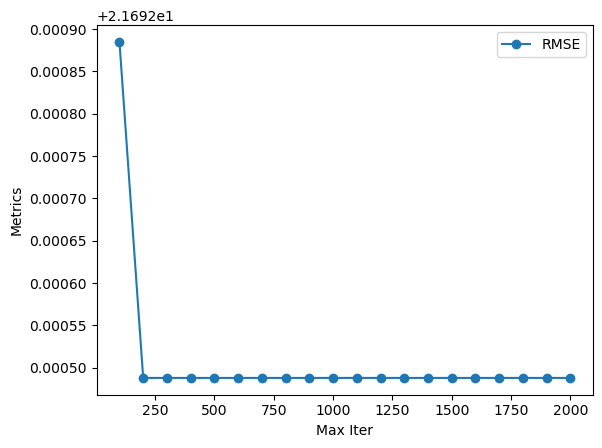

In [23]:
plt.plot(max_iter, rmse_list, marker="o", label="RMSE")
plt.xlabel("Max Iter")
plt.ylabel("Metrics")
plt.legend()

In [24]:
best_max_iter = max_iter[np.argmin(rmse_list)]
best_max_iter

200

## 2.4 Test Performance

In [26]:
# Define polynomial model
poly = PolynomialFeatures(degree=best_degree)
X_poly_train = poly.fit_transform(X_train)
X_poly_val = poly.fit_transform(X_val)
X_poly_test = poly.fit_transform(X_test)

# Train Model
poly_elastic_net = ElasticNet(
    random_state=42, alpha=best_alpha, l1_ratio=best_l1, max_iter=best_max_iter
)
# Fit Model
poly_elastic_net.fit(
    np.concatenate((X_poly_train, X_poly_val)), np.concatenate((y_train, y_val))
)

# Predict
y_pred_test = poly_elastic_net.predict(X_poly_test)

# Performance Metrics
r2_test = mt.r2_score(y_test, y_pred_test)
mse_test = mt.mean_squared_error(y_test, y_pred_test)
rmse_test = mt.mean_squared_error(y_test, y_pred_test, squared=False)
mae_test = mt.mean_absolute_error(y_test, y_pred_test)
mape_test = mt.mean_absolute_percentage_error(y_test, y_pred_test)

print(f"Test R2: {r2_test}")
print(f"Test MSE: {mse_test}")
print(f"Test RMSE: {rmse_test}")
print(f"Test MAE: {mae_test}")
print(f"Test MAPE: {mape_test}")

Test R2: 0.059433011658061585
Test MSE: 457.96298451088165
Test RMSE: 21.400069731449047
Test MAE: 16.87083140700895
Test MAPE: 8.451147852332175


# 3.0 Results

In [ ]:
train_metrics = {
    "Algorithm": "Polynomial Regression - ElasticNet",
    "R-Squared": np.round(r2_train, 3),
    "MSE": np.round(mse_train, 3),
    "RMSE": np.round(rmse_train, 3),
    "MAE": np.round(mae_train, 3),
    "MAPE": np.round(mape_train, 3),
}
validation_metrics = {
    "Algorithm": "Polynomial Regression - ElasticNet",
    "R-Squared": np.round(r2_val, 3),
    "MSE": np.round(mse_val, 3),
    "RMSE": np.round(rmse_val, 3),
    "MAE": np.round(mae_val, 3),
    "MAPE": np.round(mape_val, 3),
}
test_metrics = {
    "Algorithm": "Polynomial Regression - ElasticNet",
    "R-Squared": np.round(r2_test, 3),
    "MSE": np.round(mse_test, 3),
    "RMSE": np.round(rmse_test, 3),
    "MAE": np.round(mae_test, 3),
    "MAPE": np.round(mape_test, 3),
}

pd.DataFrame(train_metrics, index=[0]).to_csv(
    "./reg_train_metrics.csv", mode="a", header=False
)
pd.DataFrame(validation_metrics, index=[0]).to_csv(
    "./reg_validation_metrics.csv", mode="a", header=False
)
pd.DataFrame(test_metrics, index=[0]).to_csv(
    "./reg_test_metrics.csv", mode="a", header=False
)